# Dependencies

In [86]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Data Pre-Processing

In [87]:
#used magazine dataset
df_metadata=pd.read_json('mag_sub_i.json',encoding='utf-8')
df_metadata=df_metadata.loc[:,['asin','brand','imageURLHighRes']]

In [88]:
df_metadata

,asin,brand,imageURLHighRes
0,B00005N7NQ,Reason Magazine,[https://images-na.ssl-images-amazon.com/image...
1,B00005N7OC,String Letter Publishers,[https://images-na.ssl-images-amazon.com/image...
2,B00005N7OD,Conde Nast Publications,[https://images-na.ssl-images-amazon.com/image...
3,B00005N7O9,AirAge Publishing,[https://images-na.ssl-images-amazon.com/image...
4,B00005N7O6,EPG Media & Specialty Information,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...
3380,B01HI8V19K,TI Golf Holdings,[]
3381,B01HI8V1I6,"Motorsport Marketing, Inc.",[https://images-na.ssl-images-amazon.com/image...
3382,B01HI8V0ZK,Meredith Corporation,[]
3383,B01HI8V1C2,Meredith Corporation,[]


In [89]:
df_metadata.drop_duplicates(subset=['asin'],inplace=True)

In [90]:
df_data=pd.read_json('mag_sub.json')
df_data=df_data.iloc[:,[0,4,5,7]]

In [91]:
df_data.dropna(inplace=True)

In [92]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9844 entries, 0 to 9845
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     9844 non-null   int64 
 1   reviewerID  9844 non-null   object
 2   asin        9844 non-null   object
 3   reviewText  9844 non-null   object
dtypes: int64(1), object(3)
memory usage: 384.5+ KB


# Merge Data

In [93]:
df = df_metadata.merge(df_data,on='asin')

In [94]:
df[df['brand']=='']=np.NAN

In [95]:
df['brand'].isnull().sum()

314

In [96]:
df.dropna(inplace=True)

# Visulization of Data

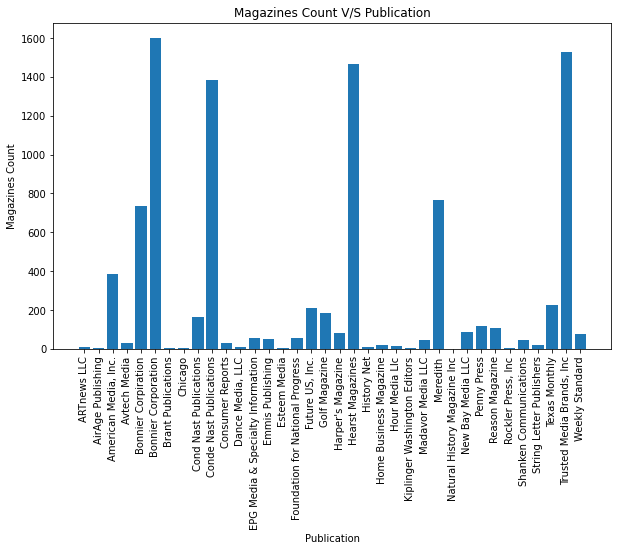

In [103]:
brands_votecount = df.groupby('brand')['overall'].count()
plt.figure(figsize=(10,6))

# plotting Publication VS Book count
plt.title('Magazines Count V/S Publication')
plt.ylabel('Magazines Count')
plt.xlabel('Publication')
plt.xticks(rotation=90)
plt.bar(brands_votecount.index,brands_votecount.values)
plt.show()

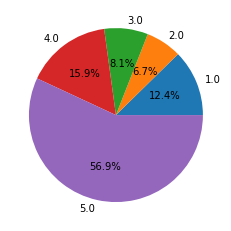

In [120]:
plt.pie(df.groupby('overall')['asin'].count().values,labels=df.groupby('overall')['asin'].count().index,autopct='%0.1f%%')
plt.show()

In [52]:
df.drop(['brand','imageURLHighRes'],axis=1,inplace=True)

# Sentiment Analysis

In [53]:
analyzer = SentimentIntensityAnalyzer()

In [54]:
def sentiment_analyzer(text):
    try:
        return analyzer.polarity_scores(text)
    except:
        return None
df['sentiment'] = df['reviewText'].apply(sentiment_analyzer)
df

,asin,overall,reviewerID,reviewText,sentiment
0,B00005N7NQ,5.0,A28E1OQD45QE9Y,Reason is never afraid to show opposing views....,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp..."
1,B00005N7NQ,4.0,ADVLRJS633OTD,"For those of you with a Libertarian bent, this...","{'neg': 0.016, 'neu': 0.772, 'pos': 0.212, 'co..."
2,B00005N7NQ,4.0,AN92S28RV1FQ4,I've been reading Reason off and on for decade...,"{'neg': 0.061, 'neu': 0.848, 'pos': 0.091, 'co..."
3,B00005N7NQ,5.0,A1QRMSX0CEQZKP,Reason cannot be labeled conservative or lefti...,"{'neg': 0.091, 'neu': 0.778, 'pos': 0.131, 'co..."
4,B00005N7NQ,5.0,A3JA4NNFDJ948K,"Reason magazine has the tag-line ""free minds a...","{'neg': 0.048, 'neu': 0.768, 'pos': 0.183, 'co..."
...,...,...,...,...,...
9839,B00005N7VQ,4.0,A2WSQ8GHBSP1RQ,I've been immensely enjoying reading this maga...,"{'neg': 0.127, 'neu': 0.719, 'pos': 0.155, 'co..."
9840,B00005N7VQ,5.0,A3M27VCQ6NNXUY,I've never been exposed to this publication be...,"{'neg': 0.107, 'neu': 0.618, 'pos': 0.275, 'co..."
9841,B00005N7VQ,4.0,A2LQ74021NS3ZT,"I've read Asimov's for years, and when I saw i...","{'neg': 0.04, 'neu': 0.888, 'pos': 0.072, 'com..."
9842,B00005N7VQ,5.0,A2IUQMQV7NMOMR,SF mags like this are the lifeblood of SF. Th...,"{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'comp..."


In [55]:
# df['neg'] = [ i['neg']*100 for i in df['sentiment']]
# pos = [ i['neg'] for i in df['sentiment']]
df['compound'] = [ i['compound'] for i in df['sentiment']]
df.head()

,asin,overall,reviewerID,reviewText,sentiment,compound
0,B00005N7NQ,5.0,A28E1OQD45QE9Y,Reason is never afraid to show opposing views....,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.6800
1,B00005N7NQ,4.0,ADVLRJS633OTD,"For those of you with a Libertarian bent, this...","{'neg': 0.016, 'neu': 0.772, 'pos': 0.212, 'co...",0.9672
2,B00005N7NQ,4.0,AN92S28RV1FQ4,I've been reading Reason off and on for decade...,"{'neg': 0.061, 'neu': 0.848, 'pos': 0.091, 'co...",0.1010
3,B00005N7NQ,5.0,A1QRMSX0CEQZKP,Reason cannot be labeled conservative or lefti...,"{'neg': 0.091, 'neu': 0.778, 'pos': 0.131, 'co...",0.4179
4,B00005N7NQ,5.0,A3JA4NNFDJ948K,"Reason magazine has the tag-line ""free minds a...","{'neg': 0.048, 'neu': 0.768, 'pos': 0.183, 'co...",0.8954


In [56]:
df['newScore'] = df['overall']*df['compound']

In [57]:
df.head()

,asin,overall,reviewerID,reviewText,sentiment,compound,newScore
0,B00005N7NQ,5.0,A28E1OQD45QE9Y,Reason is never afraid to show opposing views....,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.6800,3.4000
1,B00005N7NQ,4.0,ADVLRJS633OTD,"For those of you with a Libertarian bent, this...","{'neg': 0.016, 'neu': 0.772, 'pos': 0.212, 'co...",0.9672,3.8688
2,B00005N7NQ,4.0,AN92S28RV1FQ4,I've been reading Reason off and on for decade...,"{'neg': 0.061, 'neu': 0.848, 'pos': 0.091, 'co...",0.1010,0.4040
3,B00005N7NQ,5.0,A1QRMSX0CEQZKP,Reason cannot be labeled conservative or lefti...,"{'neg': 0.091, 'neu': 0.778, 'pos': 0.131, 'co...",0.4179,2.0895
4,B00005N7NQ,5.0,A3JA4NNFDJ948K,"Reason magazine has the tag-line ""free minds a...","{'neg': 0.048, 'neu': 0.768, 'pos': 0.183, 'co...",0.8954,4.4770


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['reviewerID'] = le.fit_transform(df['reviewerID'])
df.head()

,asin,overall,reviewerID,reviewText,sentiment,compound,newScore
0,B00005N7NQ,5.0,2906,Reason is never afraid to show opposing views....,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.6800,3.4000
1,B00005N7NQ,4.0,7598,"For those of you with a Libertarian bent, this...","{'neg': 0.016, 'neu': 0.772, 'pos': 0.212, 'co...",0.9672,3.8688
2,B00005N7NQ,4.0,8237,I've been reading Reason off and on for decade...,"{'neg': 0.061, 'neu': 0.848, 'pos': 0.091, 'co...",0.1010,0.4040
3,B00005N7NQ,5.0,1756,Reason cannot be labeled conservative or lefti...,"{'neg': 0.091, 'neu': 0.778, 'pos': 0.131, 'co...",0.4179,2.0895
4,B00005N7NQ,5.0,6088,"Reason magazine has the tag-line ""free minds a...","{'neg': 0.048, 'neu': 0.768, 'pos': 0.183, 'co...",0.8954,4.4770


In [59]:
def rating(i):
    if i < 0:
        return 1
    elif i <= 2:
        return 2
    elif i <= 3:
        return 3
    elif i<=4:
        return 4
    else:
        return 5


In [60]:
df['Useful_Score'] = df['newScore'].apply(rating)
df['Useful_Score'] = pd.to_numeric(df['Useful_Score'])

In [61]:
df.head()

,asin,overall,reviewerID,reviewText,sentiment,compound,newScore,Useful_Score
0,B00005N7NQ,5.0,2906,Reason is never afraid to show opposing views....,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.6800,3.4000,4
1,B00005N7NQ,4.0,7598,"For those of you with a Libertarian bent, this...","{'neg': 0.016, 'neu': 0.772, 'pos': 0.212, 'co...",0.9672,3.8688,4
2,B00005N7NQ,4.0,8237,I've been reading Reason off and on for decade...,"{'neg': 0.061, 'neu': 0.848, 'pos': 0.091, 'co...",0.1010,0.4040,2
3,B00005N7NQ,5.0,1756,Reason cannot be labeled conservative or lefti...,"{'neg': 0.091, 'neu': 0.778, 'pos': 0.131, 'co...",0.4179,2.0895,3
4,B00005N7NQ,5.0,6088,"Reason magazine has the tag-line ""free minds a...","{'neg': 0.048, 'neu': 0.768, 'pos': 0.183, 'co...",0.8954,4.4770,5


In [62]:
df.shape

(9530, 8)

In [63]:
df_pivot = df.pivot_table(index='asin',columns='reviewerID',values='Useful_Score').fillna(0)
df_pivot

reviewerID,0,1,2,3,4,5,6,7,8,9,...,9089,9090,9091,9092,9093,9094,9095,9096,9097,9098
asin,,,,,,,,,,,,,,,,,,,,,
B00005N7NQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7O6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7OC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7OD,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7OJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7OP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7OU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N7OV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
B00005N7P0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from scipy.sparse import csr_matrix
df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 26)	2.0
  (0, 38)	4.0
  (0, 149)	2.0
  (0, 175)	2.0
  (0, 267)	1.0
  (0, 373)	2.0
  (0, 394)	2.0
  (0, 432)	1.0
  (0, 695)	5.0
  (0, 846)	4.0
  (0, 979)	4.0
  (0, 1228)	4.0
  (0, 1396)	2.0
  (0, 1504)	2.0
  (0, 1548)	2.0
  (0, 1590)	3.0
  (0, 1662)	2.0
  (0, 1756)	3.0
  (0, 1853)	2.0
  (0, 1955)	4.5
  (0, 2123)	1.0
  (0, 2151)	4.0
  (0, 2196)	1.0
  (0, 2259)	4.0
  (0, 2267)	2.0
  :	:
  (47, 6783)	3.0
  (47, 6905)	2.0
  (47, 7484)	5.0
  (47, 8014)	2.0
  (47, 8047)	2.0
  (47, 8136)	3.0
  (47, 8356)	2.0
  (47, 8606)	2.0
  (47, 8822)	4.0
  (48, 451)	4.0
  (48, 491)	3.0
  (48, 943)	1.0
  (48, 1299)	5.0
  (48, 1624)	4.0
  (48, 3620)	2.0
  (48, 4603)	2.0
  (48, 4605)	5.0
  (48, 4670)	1.0
  (48, 4710)	4.0
  (48, 4767)	5.0
  (48, 5420)	2.0
  (48, 5472)	3.0
  (48, 7263)	5.0
  (48, 7563)	4.0
  (48, 9017)	5.0


In [65]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', n_neighbors=5, radius=2)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', radius=2)

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(df_pivot)

In [67]:
df

,asin,overall,reviewerID,reviewText,sentiment,compound,newScore,Useful_Score
0,B00005N7NQ,5.0,2906,Reason is never afraid to show opposing views....,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.6800,3.4000,4
1,B00005N7NQ,4.0,7598,"For those of you with a Libertarian bent, this...","{'neg': 0.016, 'neu': 0.772, 'pos': 0.212, 'co...",0.9672,3.8688,4
2,B00005N7NQ,4.0,8237,I've been reading Reason off and on for decade...,"{'neg': 0.061, 'neu': 0.848, 'pos': 0.091, 'co...",0.1010,0.4040,2
3,B00005N7NQ,5.0,1756,Reason cannot be labeled conservative or lefti...,"{'neg': 0.091, 'neu': 0.778, 'pos': 0.131, 'co...",0.4179,2.0895,3
4,B00005N7NQ,5.0,6088,"Reason magazine has the tag-line ""free minds a...","{'neg': 0.048, 'neu': 0.768, 'pos': 0.183, 'co...",0.8954,4.4770,5
...,...,...,...,...,...,...,...,...
9839,B00005N7VQ,4.0,4566,I've been immensely enjoying reading this maga...,"{'neg': 0.127, 'neu': 0.719, 'pos': 0.155, 'co...",0.7709,3.0836,4
9840,B00005N7VQ,5.0,6275,I've never been exposed to this publication be...,"{'neg': 0.107, 'neu': 0.618, 'pos': 0.275, 'co...",0.9698,4.8490,5
9841,B00005N7VQ,4.0,3806,"I've read Asimov's for years, and when I saw i...","{'neg': 0.04, 'neu': 0.888, 'pos': 0.072, 'com...",0.6597,2.6388,3
9842,B00005N7VQ,5.0,3608,SF mags like this are the lifeblood of SF. Th...,"{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'comp...",0.9041,4.5205,5


# Evaluate

In [68]:
pid = input('Enter Product Id(asin): ')
data = df_pivot.index.to_list()
pid

'B00005N7S8'

In [69]:
query_index = data.index(pid)
print(query_index)

30


In [70]:
distance,indices = model_knn.kneighbors(df_pivot.iloc[query_index].values.reshape(1,-1),n_neighbors=5)
print(distance[0])
print(indices[0])

[0.         0.96021206 0.99241042 1.         1.        ]
[30  1 40 32 33]


In [71]:
# pd.DataFrame(similarity_matrix)

In [72]:
def return_data(inds):
    ret=[]
    for i in inds:
        ret.append(data[i])
    return ret

nearest = return_data(indices[0])
nearest

['B00005N7S8', 'B00005N7O6', 'B00005N7TL', 'B00005N7SC', 'B00005N7SL']

In [73]:
df_recommendation = pd.DataFrame(nearest,[indices[0],distance[0]])
df_recommendation

,,0
30,0.000000,B00005N7S8
1,0.960212,B00005N7O6
40,0.992410,B00005N7TL
32,1.000000,B00005N7SC
33,1.000000,B00005N7SL


In [74]:
c

In [75]:
df_recommendation['Publication']=df_recommendation[0].apply(detail_brand)
df_recommendation['URL']=df_recommendation[0].apply(detail_url)

In [76]:
# df_metadata[df_metadata['asin']=='B00005N7S8']['brand'].values[0]

In [77]:
df_recommendation['URL'].values

array(['https://images-na.ssl-images-amazon.com/images/I/51cVSs26CYL.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/61xe7XAgMoL.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/41WSNYAPayL.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/61yZtotuBpL.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/51m3PhssW%2BL.jpg'],
      dtype=object)

# Displaying Recommendation

In [78]:
from IPython.display import Image

---------------------Searched--------------------
ID --> B00005N7S8
Publication --> Madavor Media LLC


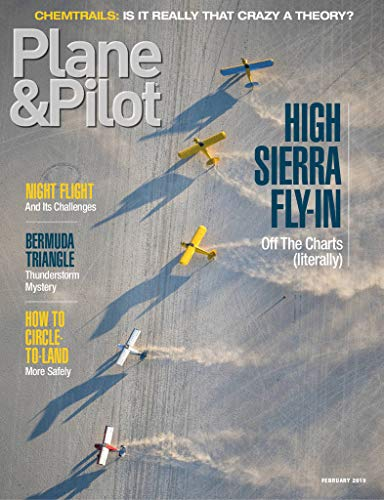

In [79]:
print('---------------------Searched--------------------')
print("ID -->",df_recommendation.iloc[0].values[0])
print("Publication -->",df_recommendation.iloc[0].values[1])
Image(df_recommendation.iloc[0]['URL'])

---------------------First Recommendation--------------------
ID --> B00005N7O6
Publication --> EPG Media & Specialty Information


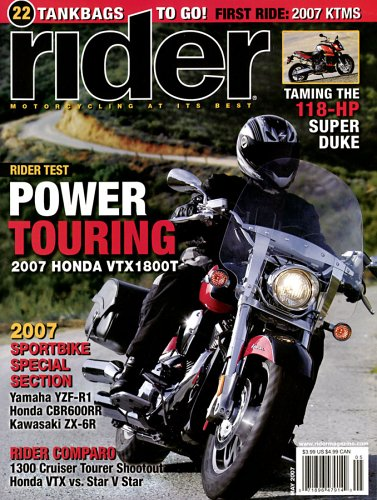

In [80]:

print('---------------------First Recommendation--------------------')
print("ID -->",df_recommendation.iloc[1].values[0])
print("Publication -->",df_recommendation.iloc[1].values[1])
Image(df_recommendation.iloc[1]['URL'])

---------------------Second Recommendation--------------------
ID --> B00005N7TL
Publication --> Conde Nast Publications


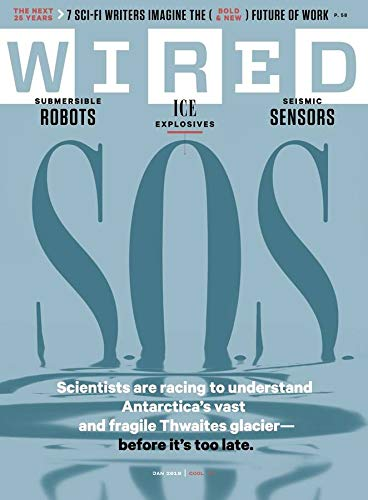

In [81]:

print('---------------------Second Recommendation--------------------')
print("ID -->",df_recommendation.iloc[2].values[0])
print("Publication -->",df_recommendation.iloc[2].values[1])
Image(df_recommendation.iloc[2]['URL'])



---------------------Third Recommendation--------------------
ID --> B00005N7SC
Publication --> Bonnier Corporation


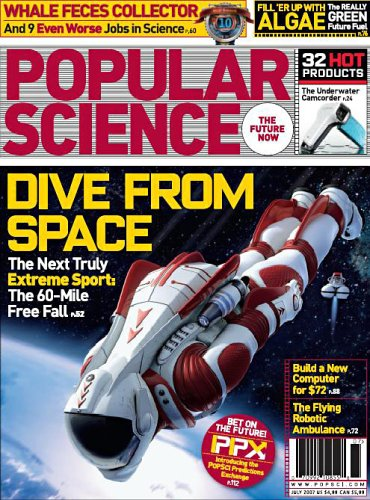

In [82]:
print('---------------------Third Recommendation--------------------')
print("ID -->",df_recommendation.iloc[3].values[0])
print("Publication -->",df_recommendation.iloc[3].values[1])
Image(df_recommendation.iloc[3]['URL'])

---------------------Fourth Recommendation--------------------
ID --> B00005N7SL
Publication --> Bonnier Corporation


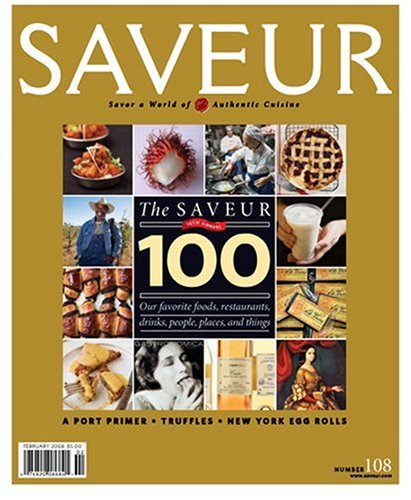

In [83]:
print('---------------------Fourth Recommendation--------------------')
print("ID -->",df_recommendation.iloc[4].values[0])
print("Publication -->",df_recommendation.iloc[4].values[1])
Image(df_recommendation.iloc[4]['URL'])